In [453]:
import pandas as pd  # For dataframe manipulation
import numpy as np # For specifying ranges in plots 
import matplotlib.pyplot as plt# For plotting
import seaborn as sns # For plotting
file=pd.read_csv('file.csv') # Read the CSV file
file.describe() 


,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,30.998413,470.972916
std,909.471,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,8.831095,517.015433
min,1.000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
25%,788.250,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,25.000000,113.801250
50%,1575.500,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,30.000000,228.480000
75%,2362.750,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,30.000000,788.388750
max,3150.000,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,55.000000,2165.280000


yes    2655
no      495
Name: Churn, dtype: int64


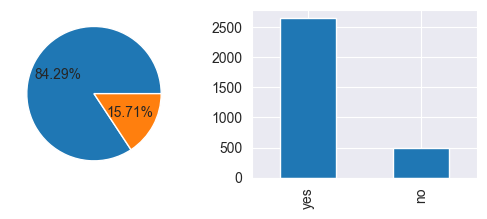

In [454]:
# Display the distribution of the class Churn label
print(file['Churn'].value_counts())
plt.subplot(2,2,1)  

plt.pie(file['Churn'].value_counts(), autopct='%1.2f%%')
plt.subplot(2,2,2)
file['Churn'].value_counts().plot.bar()

plt.show()


In [455]:

# file.groupby(['Age Group'])['Churn'].hist()
# plt.xlabel('Churn')
# plt.ylabel('Age group')
# plt.legend()
# plt.show()
# //////////////////////////
# sns.countplot(x='Age Group', hue = 'Churn',data = file)
# plt.show()
# /////////////////////////////


Text(0, 0.5, 'Count')

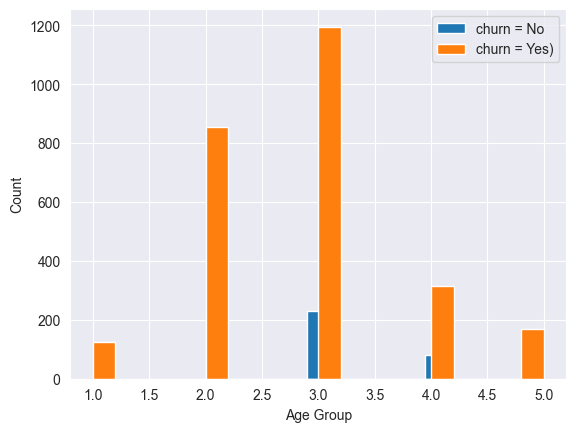

In [456]:
file[file["Churn"] == 'no']['Age Group'].hist(bins=20, label='churn = No', alpha=1)
file[file["Churn"] == 'yes']['Age Group'].hist(bins=20, label='churn = Yes)', alpha=1)

# Add a legend and labels
plt.legend()
plt.xlabel('Age Group')
plt.ylabel('Count')

Text(0, 0.5, 'count')

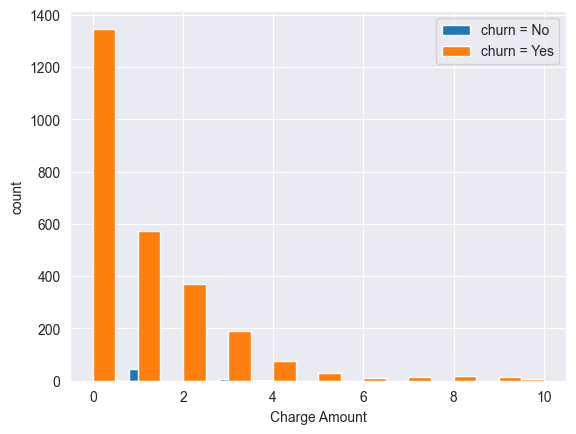

In [457]:
file[file["Churn"] == 'no']['Charge Amount'].hist(bins=10, label='churn = No', alpha=1)
file[file["Churn"] == 'yes']['Charge Amount'].hist(bins=20, label='churn = Yes', alpha=1)

# Add a legend and labels
plt.legend()
plt.xlabel('Charge Amount')
plt.ylabel('count')

In [458]:
# Basic information
file['Charge Amount'].info()
print('_________________________________________________________________')
details = file[['Charge Amount', 'Customer Value']]
details.info()
details.describe()


<class 'pandas.core.series.Series'>
RangeIndex: 3150 entries, 0 to 3149
Series name: Charge Amount
Non-Null Count  Dtype
--------------  -----
3150 non-null   int64
dtypes: int64(1)
memory usage: 24.7 KB
_________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Charge Amount   3150 non-null   int64  
 1   Customer Value  3150 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.3 KB


,Charge Amount,Customer Value
count,3150.000000,3150.000000
mean,0.942857,470.972916
std,1.521072,517.015433
min,0.000000,0.000000
25%,0.000000,113.801250
50%,0.000000,228.480000
75%,1.000000,788.388750
max,10.000000,2165.280000


C:\Users\Acer\AppData\Local\Temp\ipykernel_15492\4143736822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(file.corr(), cmap="Greens",annot = True)


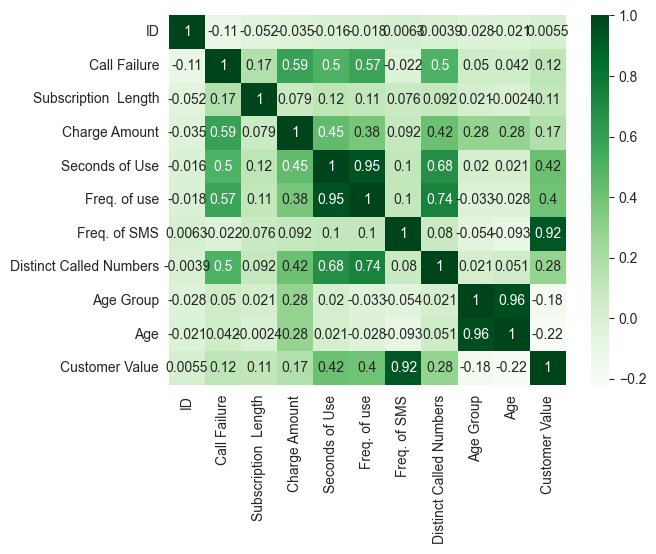

In [459]:
sns.heatmap(file.corr(), cmap="Greens",annot = True)
plt.show()

In [460]:
file.isnull().sum()
file.drop(['Age Group'], axis = 1, inplace=True )
file.drop(['ID'],axis=1, inplace=True)



In [461]:
# Checking if there are any negative values 
print('Minimum value in ',file.min())
#preparing categorical data for machine learning models In binary columns, just replace values with 1 and 0
cat_cols = [c for c in file.columns if file[c].dtype == 'object'
                    or c == 'SeniorCitizen']
df_categorical = file[cat_cols].copy()
for col in cat_cols:
    if df_categorical[col].nunique() == 2:
        df_categorical[col], _ = pd.factorize(df_categorical[col])
    else:
        df_categorical = pd.get_dummies(df_categorical, columns=[col])

#in order to replace categorical data in dataset 
file= file.drop(['Complains', 'Plan', 'Status','Churn'],axis = 1)
file = pd.concat([df_categorical,file],axis = 1)
file.head()

Minimum value in  Call Failure                       0
Complains                         no
Subscription  Length               3
Charge Amount                      0
Seconds of Use                     0
Freq. of use                       0
Freq. of SMS                       0
Distinct Called Numbers            0
Plan                       post-paid
Status                        active
Age                               15
Customer Value                   0.0
Churn                             no
dtype: object


,Complains,Plan,Status,Churn,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age,Customer Value
0,0,0,0,0,3,10,2,1603,25,32,11,30,193.120
1,0,0,0,1,8,37,0,4255,65,0,13,25,194.400
2,0,0,1,1,0,38,0,0,0,0,0,25,0.000
3,0,0,0,1,10,36,0,2338,54,327,20,25,1579.140
4,0,0,0,1,10,37,0,4083,60,0,31,15,227.865


In [462]:
from sklearn.model_selection import train_test_split

# # Split the data into 80-20 for training set / test set

y = file['Churn']
X = file.drop('Churn', axis=1)

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
X_train.shape
file.head(3)


,Complains,Plan,Status,Churn,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age,Customer Value
0,0,0,0,0,3,10,2,1603,25,32,11,30,193.12
1,0,0,0,1,8,37,0,4255,65,0,13,25,194.40
2,0,0,1,1,0,38,0,0,0,0,0,25,0.00


In [463]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# # Initialize model
# LMR1 = linear_model.LinearRegression()
y=file["Customer Value"]
X = file.drop('Customer Value', axis=1)
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0) 


# # LMR1.fit(X,y)


# # # with statsmodels
x = sm.add_constant(X) # adding a constant
 
est = sm.OLS(y, x).fit()
predictions = est.predict(x) 
 
print_model = est.summary()
# print(print_model)
#%% Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range (len(X.columns))]
print(vif_data)

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)
# # line=45 option to plot the data around 45 degree line
# probplot = sm.ProbPlot(est.resid)
# plt.figure()
# probplot.ppplot(line='45')
# plt.show()

                    feature        VIF
0                 Complains   1.457818
1                      Plan   1.464978
2                    Status   1.990776
3                     Churn   1.807326
4              Call Failure   2.954046
5      Subscription  Length   1.179592
6             Charge Amount   3.080500
7            Seconds of Use  14.414095
8              Freq. of use  18.787579
9              Freq. of SMS   1.183826
10  Distinct Called Numbers   2.414662
11                      Age   1.212817
['Freq. of use', 'Seconds of Use']


In [464]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
kf = KFold(10, random_state=42, shuffle=True)

# Train our baseline LR Regression model for feature importance scoring/feature selection
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

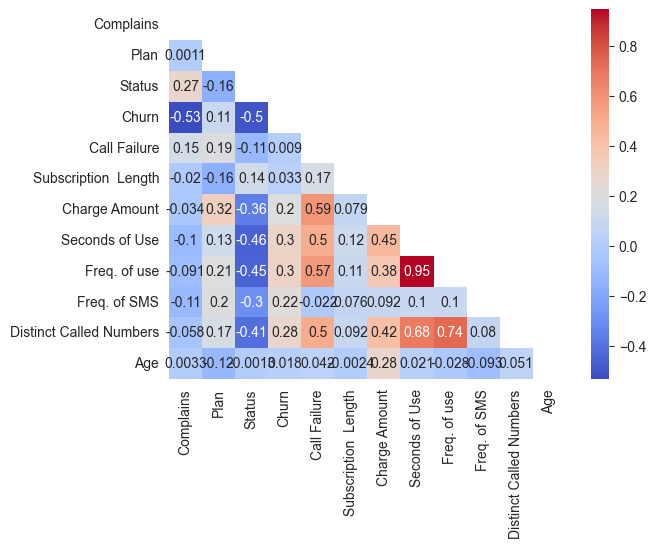

In [465]:
sns.set_style("whitegrid")
mask = np.triu(np.ones_like(X.corr()))
corr = sns.heatmap(X.corr(), annot=True, cmap='coolwarm', mask=mask)

In [466]:
vif_factor['p-values']=est.pvalues[1:]
vif_factor


NameError: name 'vif_factor' is not defined

Test: 2520, 2520
Train: 630,630


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as sm
X = file.drop('Customer Value', axis=1)
y=file["Customer Value"]
# //Normlize data
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0) 

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
LMR1=LinearRegression().fit(x_train,y_train)
LMR1_pred=LMR1.predict(x_test)
print('Intercept: \n', LMR1.intercept_)
print('Coefficients: \n', LMR1.coef_)
print("RMSE:",np.sqrt(mean_squared_error(y_test,LMR1_pred)))
print("R*2:",r2_score(y_test,LMR1_pred))




Intercept: 
 470.8358476408755
Coefficients: 
 [  1.46504574  20.10829383  -3.9615699   -0.73333349  -4.25415174
   4.63591871 -20.66264244 200.79678224 -31.01574583 451.85766167
   7.40674922 -68.48757618]
RMSE: 74.01121049808165
R*2: 0.9798388903511214


C:\Users\Acer\AppData\Local\Temp\ipykernel_15492\2304765310.py:9: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = file.drop('Churn', axis=1).corrwith(y)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

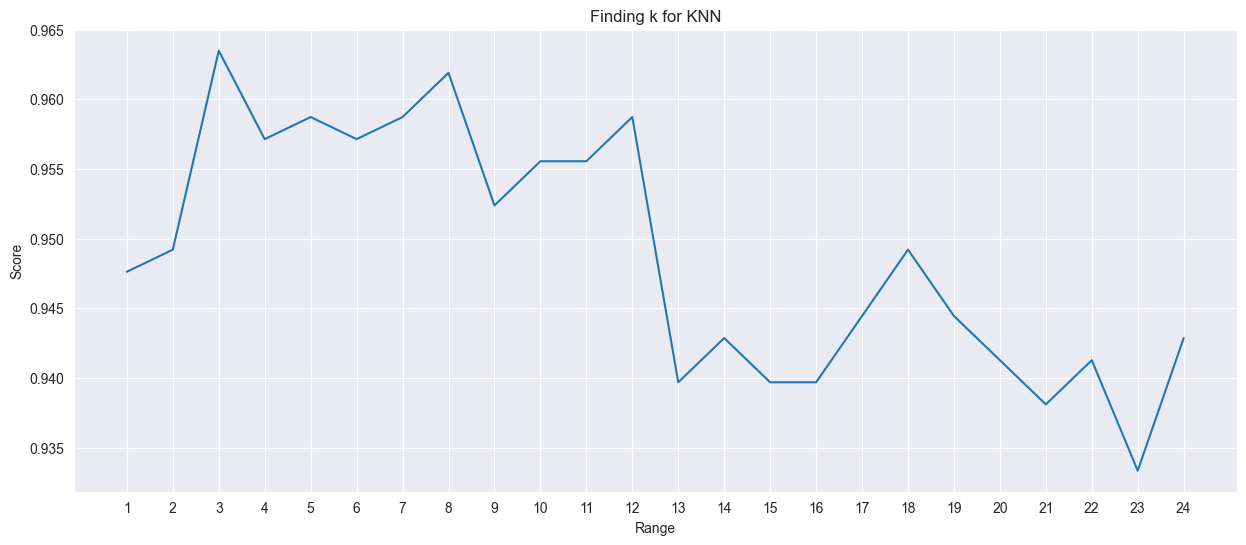

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report# Pass actual test and predicted target test outcomes to function

#get feauters
Y = file['Churn'].values
X = file.drop('Churn', axis=1).values
# #Normlize Data   || so good For KNN which is based on the distance of data points

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# #split Data
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2,random_state=4)

# # #assuum k number between 3 and 10 so i choose 3 after after many attempts mybe good :)
k =3
# # #Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
predecit = knn.predict(X_test)
# print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Model Accuracy score: {0:0.4f}".format(metrics.accuracy_score(y_test, predecit)))

cm_knn = confusion_matrix(y_test,predecit)
print(classification_report(y_test,predecit))
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,predecit)
print(f"ROC AUC For Knn {score:.4f}")
from sklearn.metrics import recall_score, precision_score,f1_score
print("precision_score :",precision_score( y_test, predecit))
print(" recall_score :",recall_score(y_test,predecit))
print("F1 score :",f1_score(y_test,predecit))


Model Accuracy score: 0.9524
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.98      0.97      0.97       527

    accuracy                           0.95       630
   macro avg       0.91      0.92      0.91       630
weighted avg       0.95      0.95      0.95       630

ROC AUC For Knn 0.9208
precision_score : 0.9751434034416826
 recall_score : 0.967741935483871
F1 score : 0.9714285714285715


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report# Pass actual test and predicted target test outcomes to function

Y = file['Churn'].values
X = file.drop('Churn', axis=1).values
#Normlize Data || Same As preprocessing Function (standerScaler)
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0) 
#split Data
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2,random_state=4)
#Creat Model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
#redection
y_pred = gnb.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
cm_nb = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,y_pred)
print(f"ROC AUC For NB: {score:.4f}")
from sklearn.metrics import recall_score, precision_score,f1_score
print("precision_score :",precision_score( y_test, y_pred ))
print(" recall_score :",recall_score(y_test, y_pred))
print("F1 score :",f1_score(y_test, y_pred))



Model accuracy score: 0.7254
              precision    recall  f1-score   support

           0       0.37      0.96      0.53       103
           1       0.99      0.68      0.81       527

    accuracy                           0.73       630
   macro avg       0.68      0.82      0.67       630
weighted avg       0.89      0.73      0.76       630

ROC AUC For NB: 0.8202
precision_score : 0.988950276243094
 recall_score : 0.6793168880455408
F1 score : 0.8053993250843644


In [ ]:
from sklearn.linear_model import LogisticRegression
Y = file['Churn'].values
X = file.drop('Churn', axis=1).values
#Normlize Data || Same As preprocessing Function (standerScaler)
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0) 
#split Data
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2,random_state=4)
#Create Logistic Regression Model Model
lor_model = LogisticRegression()
lor_model.fit(X_train,y_train)
# y_hat_train =lor_model.predict(X_train)
y_hat_test = lor_model.predict(X_test)
print('Logistic Regression')
print('Testing accuracy: {0:0.4f}'. format( lor_model.score(X_test, y_test)))
# print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_hat_test)))

from sklearn.metrics import confusion_matrix, classification_report# Pass actual test and predicted target test outcomes to function
cmlr = confusion_matrix(y_test, y_hat_test)
print(classification_report(y_test,y_hat_test))

from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,y_hat_test)
from sklearn.metrics import recall_score, precision_score,f1_score

print(f"ROC AUC For Logistic regression: {score:.4f}")
from sklearn.metrics import recall_score, precision_score,f1_score
print("precision_score :",precision_score( y_test, y_hat_test ))
print(" recall_score :",recall_score(y_test, y_hat_test))
print("F1 score :",f1_score(y_test, y_hat_test))


Logistic Regression
Testing accuracy: 0.8905
              precision    recall  f1-score   support

           0       0.80      0.44      0.57       103
           1       0.90      0.98      0.94       527

    accuracy                           0.89       630
   macro avg       0.85      0.71      0.75       630
weighted avg       0.88      0.89      0.88       630

ROC AUC For Logistic regression: 0.7080
precision_score  0.8989547038327527
 recall_score 0.9791271347248577
F1 score 0.9373297002724796


In [ ]:
print('Confusion matrix\n\n', cmlr)

print('\nTrue Positives(TP) = ', cmlr[0,0])

print('\nTrue Negatives(TN) = ', cmlr[1,1])

print('\nFalse Positives(FP) = ', cmlr[0,1])

print('\nFalse Negatives(FN) = ', cmlr[1,0])

#Lets calculate Precision, Recall and F1 score for label 0 and 1
#For Label 0
tp = cmlr[0,0]
fp = cmlr[1,0]
fn = cmlr[0,1]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label  0 for Logistic Regression')
print('The precision for label 0 is: {0:.2f}'.format(precision))
print('The recall for label 0 is: {0:.2f}'.format(recall))
print('The f1-score for label 0 is: {0:.2f}'.format(f1_score))
print('\n')
print('For Label 1')
tp = cmlr[1,1]
fp = cmlr[0,1]
fn = cmlr[1,0]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 1')
print('The precision for label 1 is: {0:.2f}'.format(precision))
print('The recall for label 1 is: {0:.2f}'.format(recall))
print('The f1-score for label 1 is: {0:.2f}'.format(f1_score))


Confusion matrix

 [[ 45  58]
 [ 11 516]]

True Positives(TP) =  45

True Negatives(TN) =  516

False Positives(FP) =  58

False Negatives(FN) =  11
precision, recall and f1-score for label  0 for Logistic Regression
The precision for label 0 is: 0.80
The recall for label 0 is: 0.44
The f1-score for label 0 is: 0.57


For Label 1
precision, recall and f1-score for label 1
The precision for label 1 is: 0.90
The recall for label 1 is: 0.98
The f1-score for label 1 is: 0.94


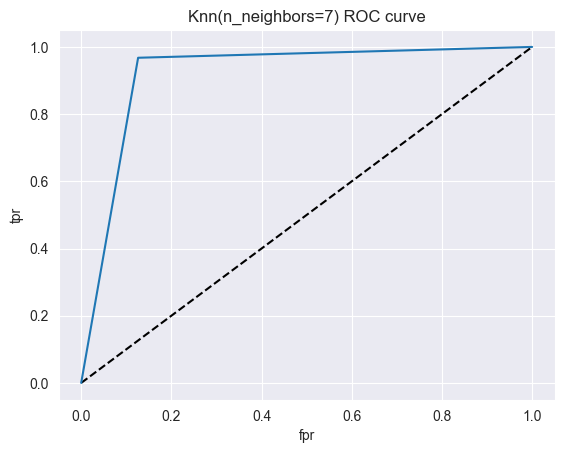

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,predecit)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()


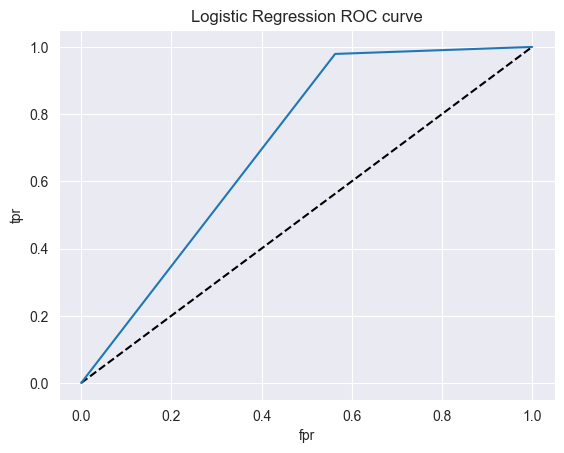

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_hat_test)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

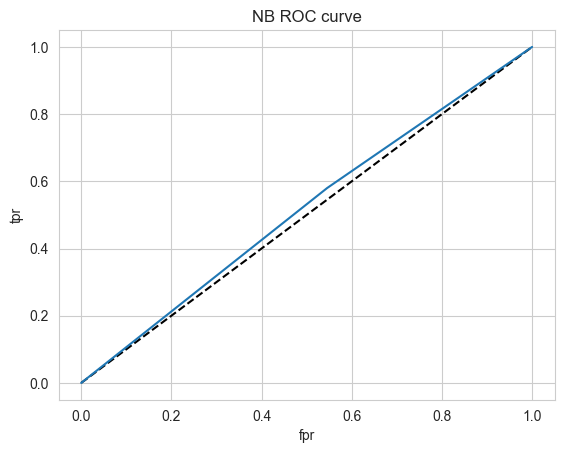

In [467]:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('NB ROC curve')
plt.show()